# TensorFlow and Neural Networks

## Introductory Neural Netwoks

### Jack Bennetto

#### March 7, 2017

## Objectives

* Use TensorFlow to do calculations.
* Know the advantages and disadvantages of neural networks.
* Explain the basic neural-network algorithms.
* Build a simple neural network in TensorFlow.

## What are Neural Networks?

Neural Networks were originally developed in the 1950's using the neurons in the brain as inspiration.

In the brain, we have neurons connected together by dendrons of different strengths, and these strength change as we learn. The connections are non-linear; a neural doesn't activate at all until it has sufficient input.

But don't get too caught up in the analogy. Brains are an inspiration, not a model, and trying to fit to closely to them hasn't always helped researchers.

In general, neural networks are...

### Terminology

I'm using the term 'neural network' throughout the lecture. The term 'deep learning' has become popular as well in recent years, in part to move away from the idea that these are based on the brain, and in part to emphasize the depth that's become possible.


## Why Neural Networks?

In general, neural networks perform well with high-dimensional data such as images, audio, and text.

Manifold learning

Disadvantages

 * Slow to train
 * Uninterpretable
 * Hard to tune
 * Easy to overfit (need a lot of data)

## History

Stage 1

Stage 2

Stage 3: 2006-present

Neural networks


## Neural networks

Let's start with a really simple neural network. We have a two input features and out output. We can draw it like this.

<img src="img/1-layer.png" alt="1-layer network" style="height: 180px;"/>

If we want to fill out the picture more we add weight and bias terms. And if we're building a classifier, it makes sense to add a sigmoid activation function so the output is between zero and one. We might then draw it like this.

<img src="img/1-layer-detail.png" alt="1-layer network" style="height: 250px;"/>

We could specify it as

$$
f(x; W, b) = \frac{1}{1+e^{-Wx + b}}
$$

To train the network we adjust $W$ and $b$, fitting them to the training data using stocastic gradiant descent or some other algorithm. If we're using TensorFlow, we use an optimizer as we did this morning.

If that looks familiar, that's good. We just made a graph for logistic regression. logistic regression.


Each node is called a **perceptron** or **neuron**. I'm just going to call them nodes. In general, each node (other than the first) is is a linear combination of other nodes, with parameters specified by some weights that are adjusted by training the network. The sum is (usually) passed to an **activation function** (sigmoid here; we'll talk more about that soon).

These nodes are generally grouped into **layers**. For a **fully connected** layer, every node in the layer is connected to (i.e.,  is a linear combination of) every node in the previous one. We'll talk about fully connected networks today, but there are many other architectures.

The power of neural networks comes when we add additional layers.

<img src="img/2-layers.png" alt="2-layer network" style="height: 180px;"/>

Or, to fill it out a bit.

<img src="img/2-layers-detail.png" alt="2-layer network" style="height: 350px;"/>

The initial layer is the **input layer**; the last is the **output layer**. Any intermediate layers are called **hidden layers**.

## Backpropagation

Developed it the '60s and '70s, and grew in favor in the '80s and '90s.

THe basic idea of backpropagation is that that during a training step the errors are propagated backwards, w

## Out first neural network

Although neural networks are typically used for applications as mentioned above, they can be used to fit other problems. Let's try to fit a sinusoidal curve to some noisy data.

In [12]:
import tensorflow as tf
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
npts = 10000
x_train = scs.uniform(-5, 10).rvs(npts)
y_train = np.sin(x_train) + scs.norm(0, 1.0).rvs(npts)

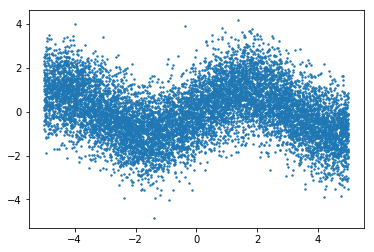

In [14]:
fig,ax = plt.subplots()
ax.scatter(x_train, y_train, s=2)

First, we create placeholders where we train the data. The first dimension of each is `None` because we'll train it with a bunch of points at once. The second dimension is `1` because there's x and y are each one-dimensional.

In [15]:
x = tf.placeholder(tf.float32, shape=[None, 1])
y = tf.placeholder(tf.float32, shape=[None, 1])

Now we build a network with one hidden layer with 5 units. `W_0` and `W_1` are the strengths of the connections between the input and hidden layer, and the hidden layer and the output. We initialize these randomly.

The biases `b_0` and `b_1` are the intercept terms. We typically start them wiht some non-zero value.

In [16]:
n_hidden = 5

W_0 = tf.Variable(tf.truncated_normal([1, n_hidden]), name='W_0')
b_0 = tf.Variable(tf.constant(0.1, shape=[n_hidden]), name='b_0')
h_0 = tf.matmul(x, W_0) + b_0
W_1 = tf.Variable(tf.truncated_normal([n_hidden, 1]), name='W_1')
b_1 = tf.Variable(tf.constant(0.1, shape=[1]), name='b_1')

yhat = tf.matmul(h_0, W_1) + b_1

Now we specify a loss function. We'll use the residual sum of squares. We could have used cross entropy instead.

In [17]:
loss = tf.reduce_sum(tf.square(yhat - y))

We create an optimizer function and use that to minimize the loss.

In [18]:
optimizer = tf.train.AdamOptimizer(0.01)
train = optimizer.minimize(loss)

When we run the `train` tensor, TensorFlow will update the variables in the graph in the direction of minimizing the `loss`.

Before we can do this, we need to create an session.

In [20]:
sess = tf.InteractiveSession()

And evaluate the global variables initializer.

In [21]:
init = tf.global_variables_initializer()
init.run()

We can now run the train step a bunch of times, feeding in the data each time.

In [22]:
for i in range(2000):
    sess.run(train, feed_dict={x:np.array(x_train).reshape(-1,1), y:y_train.reshape(-1,1)})

And plot the results. Note we're only fitting the curve between -5 and 5 as show by the vertical lines. Red is predicted; blue is the actual curve.

(-7, 7)

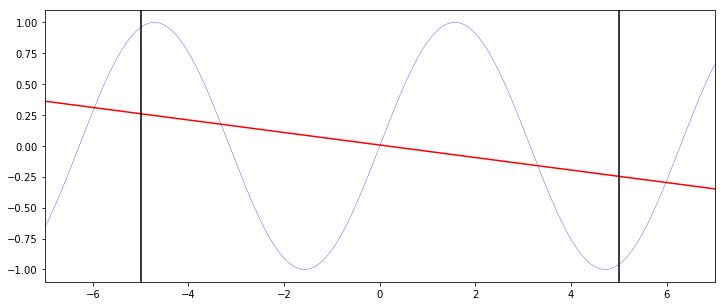

In [27]:
x_actual = np.linspace(-7,7,500)
y_actual = np.sin(x_actual)

fig,ax = plt.subplots(figsize=(12,5))
y_pred = sess.run(yhat, {x:x_actual.reshape(-1,1)})
ax.plot(x_actual,y_pred, 'r-')
ax.plot(x_actual,y_actual, 'b-', lw=0.3)

ax.axvline(-5, color='k')
ax.axvline(5, color='k')
ax.set_xlim((-7,7))

## Introducing non-linearity

The problem is that our network is completely linear, so no matter what the weights the output is a linear function of the input. In order to fix this, we need to provide some sort of non-linear function at each of the layers.

There are a number of different functions we can use.

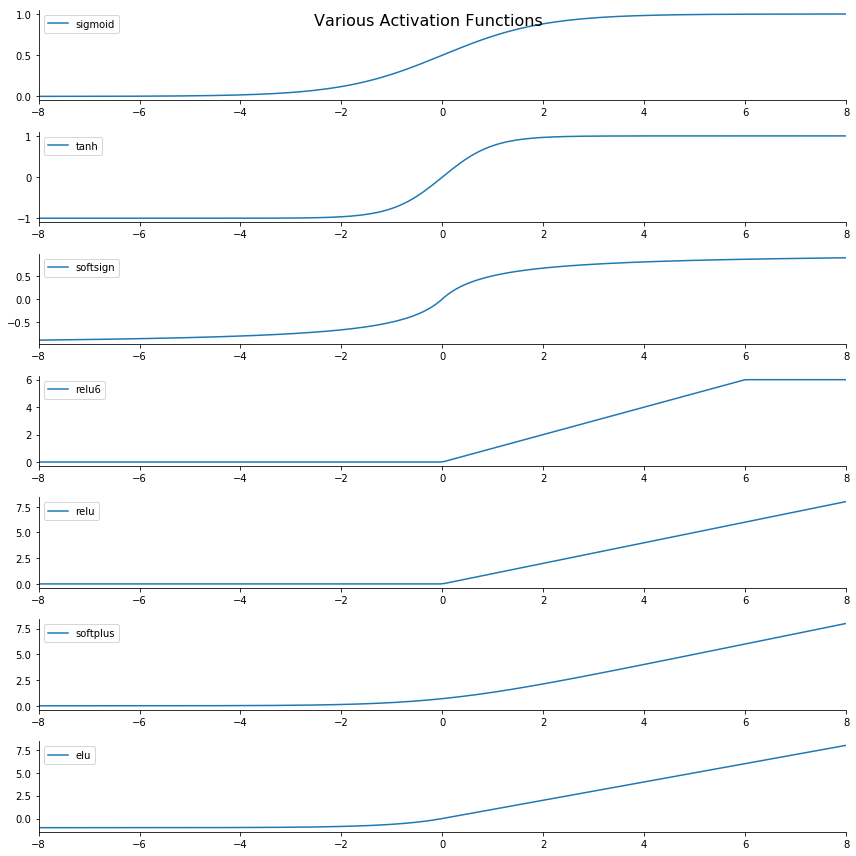

In [29]:
xpts = np.linspace(-8, 8, 200)

functions = [tf.nn.sigmoid,
             tf.nn.tanh,
             tf.nn.softsign,
             tf.nn.relu6,
             tf.nn.relu,
             tf.nn.softplus,
             tf.nn.elu]

fig,axes = plt.subplots(len(functions), figsize=(12,12))

for ax, func in zip(axes, functions):
    ax.plot(xpts, func(xpts).eval(), label=func.__name__)
    ax.legend(loc='upper left')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlim(xpts.min(), xpts.max())




fig.suptitle('Various Activation Functions', fontsize=16)
fig.tight_layout()

In [30]:
tf.nn.sigmoid.__name__

'sigmoid'

In the 90's the sigmoid curve was popular for a couple reasons. First, a sigmoid function behaves similarly to actual neurons: they don't activate until they reach a threshold, and then max out. Second, it was thought that differentiability was a Good Thing.

With experience people learned rectified linear units (relu) were generally better because saturation is bad, and it's good enough that functions are differentiable almost everywhere.

So we'll use relu (also for pedagogical reasons).

In [31]:
n_hidden = 5

W_0 = tf.Variable(tf.random_normal([1, n_hidden]), name='W_0')
b_0 = tf.Variable(tf.constant(0.1, shape=[n_hidden]), name='b_0')
h_0 = tf.nn.relu(tf.matmul(x, W_0) + b_0)
#h_0 = tf.nn.sigmoid(tf.matmul(x, W_0) + b_0)
W_1 = tf.Variable(tf.random_normal([n_hidden, 1]), name='W_1')
b_1 = tf.Variable(tf.constant(0.1, shape=[1]), name='b_1')

yhat = tf.matmul(h_0, W_1) + b_1

loss = tf.reduce_sum(tf.square(yhat - y))

optimizer = tf.train.AdamOptimizer(0.01)
train = optimizer.minimize(loss)

In [32]:
init = tf.global_variables_initializer()
sess.run(init)

In [33]:
for i in range(10000):
    sess.run(train, feed_dict={x:np.array(x_train).reshape(-1,1), y:y_train.reshape(-1,1)})

(-7, 7)

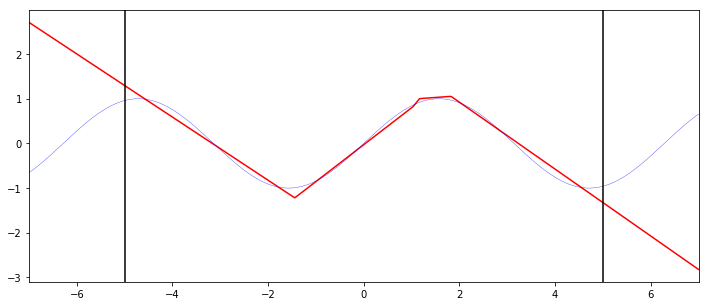

In [34]:
x_actual = np.linspace(-7,7,500)
y_actual = np.sin(x_actual)

fig,ax = plt.subplots(figsize=(12,5))
y_pred = sess.run(yhat, {x:x_actual.reshape(-1,1)})
ax.plot(x_actual,y_pred, 'r-')
ax.plot(x_actual,y_actual, 'b-', lw=0.3)

ax.axvline(-5, color='k')
ax.axvline(5, color='k')
ax.set_xlim((-7,7))

In [119]:
n_hidden = 5

W_0 = tf.Variable(tf.random_normal([1, n_hidden]), name='W_0')
b_0 = tf.Variable(tf.constant(0.1, shape=[n_hidden]), name='b_0')
h_0 = tf.nn.relu(tf.matmul(x, W_0) + b_0)
W_1 = tf.Variable(tf.random_normal([n_hidden, 1]), name='W_1')
b_1 = tf.Variable(tf.constant(0.1, shape=[1]), name='b_1')

yhat = tf.matmul(h_0, W_1) + b_1

loss = tf.reduce_sum(tf.square(yhat - y))

optimizer = tf.train.AdamOptimizer(0.01)
train = optimizer.minimize(loss)

## Regularization

Since neural networks have a large number of parameters, they are fairly easy to overfit (partucularly if there aren't all that many data points). To avoid this most neural networks include some sort of regularization. There are a number of different approaches.

The most popular approach is dropout.


One approach is the same sort of L1 or L2 regularlization on the connection weights; these have similar effect to a linear model. TensorFlow has special operations to compute L2 loss (`tensorflow.nn.l1_loss`) but it's not hard to compute otherwise. We'll use that in an example tomorrow.

Another approach is tying some of the weights together, by imposing a penalty based on the differences between certain parameters. The extreme example of this is **parameter sharing**. For this we require many of the parameters to be the same. We'll explore one example of this tomorrow with **convolutional neural networks** which are used to process images.

In CNNs, the pixels of an image are mapped to multiple channels of the same size, with weights connecting the images in the input to the pixels of each of the output channels. However, pixels are only connected to nearby pixels in the output (typically, in a 5x5 region) and the parameters corresponding to the same offset (e.g., (+1, -2)) are force to be identical. This allows translational invariance.

Other networks that uses parameter sharing are **recurrent neural networks**, which are used for time-series data. Unlike ordinary neural networks which have a single feedforward step, RNNs are executed in an arbitrary number of steps, with output or hidden units feeding back into earlier units in the network, and the input added sequentially at each step. Training these involves unwinding them in time, so parameters are shared across time rather than space.


## Fully-connected networks